In [1]:
# example for reading GPM L3 data for IWP
#   but the l2 code will run through multiple files/days
import h5py
#from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import matplotlib.pyplot as plt
import os

In [72]:
dir = '/home/dudavid/Dendrite/gpm_l2/AM2/'
#file = dir+'3A-CLIM-MO.GCOMW1.AMSR2.GRID2017R1.20170101-S000000-E235959.01.V05A.HDF5'
files = os.listdir(dir)
iwpall = []
latdex = []
popdex = []

In [73]:
for fii in files:
    #print(fii)
    f = h5py.File(dir+fii,'r')
    iw = f['S1/iceWaterPath']
    iwp = np.reshape(np.array(iw),np.size(iw))
    pop= np.reshape(np.array(f['S1/probabilityOfPrecip']),np.size(iw))
    lat= np.reshape(np.array(f['S1/Latitude']),np.size(iw))
    sfc= np.reshape(np.array(f['S1/surfaceTypeIndex']),np.size(iw))
    mask = sfc<=1
    
    iwpo,popo,lato = iwp[mask],pop[mask],lat[mask]
    iwpall.extend(iwpo)
    latdex.extend(lato)
    popdex.extend(popo)

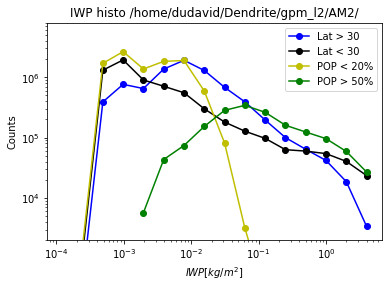

In [78]:
# create histogram of IWP
iwpa = np.array(iwpall)
#print(np.size(iwpall))
pops = np.array(popdex)
lats = np.array(latdex)
#binz = [0.0,.0001,.00025,.0005,0.001,.0025,.005,.01,.025,.05,.1,.25,.5,1,2]
binz = [2**x for x in range(-14,3)]
#mask1 = [x >= 30 and x <= 70 for x in abs(lats)] #abs(lats)>30 and abs(lats)<70]
mask1 = abs(lats)>30 # can use the above to make AM2 semi-suit GMI (slower)
mask2 = pops>=50
mask3 = abs(lats)<=30
mask4 = pops<20
ip1 = iwpa[mask1]
ip2 = iwpa[mask2]
ip3 = iwpa[mask3]
ip4 = iwpa[mask4]

hist, bin_edges  = np.histogram(iwpa,bins=binz)
hist1, bin_edges = np.histogram(ip1,bins=binz)
hist2, bin_edges = np.histogram(ip2,bins=binz)
hist3, bin_edges = np.histogram(ip3,bins=binz)
hist4, bin_edges = np.histogram(ip4,bins=binz)
fig = plt.figure()
ax = fig.add_subplot(111)

#plt.plot(binz[1:],hist,'r-o',label='All ocean')
plt.plot(binz[1:],hist1,'b-o',label='Lat > 30')
plt.plot(binz[1:],hist3,'k-o',label='Lat < 30')
plt.plot(binz[1:],hist4,'y-o',label='POP < 20%')
plt.plot(binz[1:],hist2,'g-o',label='POP > 50%')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$IWP [kg/m^2]$')
plt.ylabel('Counts')
plt.title('IWP histo '+dir)
plt.ylim(2e3,8e6)
plt.legend()
plt.show()

In [75]:
hist2

#fig = plt.figure(figsize=[20,25])
#m = Basemap(projection='cyl',lon_0=0)#,lat_0=0,resolution='l')
#lons, lats = m.makegrid(1440,720)
#x, y = m(lons, lats)
#m.drawcoastlines()
#clevs = [.001,0.004,.007,0.01,.02,.05,.075,.1,.25,.5,.75,1.0,2.0]
#cs = m.contourf(x,y,iwp,clevs,latlon=1,cmap=cm.s3pcpn)
#cbar = m.colorbar(cs,location='bottom')
#plt.show()

array([     0,      0,      0,      0,   5703,  43423,  74081, 153438,
       283302, 342886, 262560, 160344, 123869,  96175,  59026,  26889])